In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

file_path = '/content/drive/MyDrive/Fraud.csv'  # your dataset
df = pd.read_csv(file_path)

print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (6362620, 11)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


Dataset Downloaded & loaded the dataset done here

In [3]:
# See all column names & data types
print("\nColumn info:")
df.info()



Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
# Quick statistics for numeric columns
print("\nSummary statistics:")
display(df.describe())


Summary statistics:


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [5]:
# Check missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [6]:
df.rename(columns={'isFraud': 'is_fraud'}, inplace=True)


In [7]:
print("\nFraud vs Non-Fraud transactions:")
print(df['is_fraud'].value_counts())
print("\nFraud percentage:")
print(df['is_fraud'].value_counts(normalize=True) * 100)



Fraud vs Non-Fraud transactions:
is_fraud
0    6354407
1       8213
Name: count, dtype: int64

Fraud percentage:
is_fraud
0    99.870918
1     0.129082
Name: proportion, dtype: float64


In [8]:
# 1️⃣ Fill missing values
num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

df[num_cols] = df[num_cols].fillna(df[num_cols].median())
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# 2️⃣ Remove duplicate rows
print("Duplicates before:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Duplicates after:", df.duplicated().sum())

# 3️⃣ Remove extreme outliers in 'amount'
Q1 = df['amount'].quantile(0.25)
Q3 = df['amount'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR

before = df.shape[0]
df = df[(df['amount'] >= lower_limit) & (df['amount'] <= upper_limit)]
after = df.shape[0]
print(f"Removed {before - after} outlier rows in 'amount'.")

# 4️⃣ Drop irrelevant ID columns
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

# 5️⃣ Encode transaction type
df = pd.get_dummies(df, columns=['type'], drop_first=True)

print("\nCleaned dataset shape:", df.shape)


Duplicates before: 0
Duplicates after: 0
Removed 338078 outlier rows in 'amount'.

Cleaned dataset shape: (6024542, 12)


In [9]:
from sklearn.model_selection import train_test_split

# Features (X) and Target (y)
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

# Split dataset (70% train, 30% validation)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

print("Training set:", X_train.shape, "Validation set:", X_test.shape)
print("\nFraud ratio in training set:")
print(y_train.value_counts(normalize=True) * 100)


Training set: (4217179, 11) Validation set: (1807363, 11)

Fraud ratio in training set:
is_fraud
0    99.927653
1     0.072347
Name: proportion, dtype: float64


In [10]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("\nBefore SMOTE:")
print(y_train.value_counts())   # still imbalanced (~0.13%)
print("\nAfter SMOTE:")
print(y_train_res.value_counts())  # now balanced 50-50



Before SMOTE:
is_fraud
0    4214128
1       3051
Name: count, dtype: int64

After SMOTE:
is_fraud
0    4214128
1    4214128
Name: count, dtype: int64


In [11]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=500, class_weight='balanced')
lr_model.fit(X_train_res, y_train_res)


LogisticRegression(class_weight='balanced', max_iter=500)

In [15]:
from sklearn.ensemble import RandomForestClassifier  # ✅ Import first

# Take a smaller balanced sample (e.g., 50,000 rows)
train_sample = X_train_res.sample(50000, random_state=42)
target_sample = y_train_res.loc[train_sample.index]

# Define a lighter RandomForest model
rf_model = RandomForestClassifier(
    n_estimators=100,   # fewer trees → faster
    max_depth=10,       # limit depth
    class_weight='balanced',
    n_jobs=-1,          # use all CPU cores
    random_state=42
)

# Train on the sampled balanced dataset
rf_model.fit(train_sample, target_sample)



RandomForestClassifier(class_weight='balanced', max_depth=10, n_jobs=-1,
                       random_state=42)

In [14]:
!pip install xgboost
from xgboost import XGBClassifier

fraud_ratio = y_train.value_counts()[0] / y_train.value_counts()[1]

xgb_model = XGBClassifier(
    scale_pos_weight=fraud_ratio,  # handle imbalance
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    random_state=42
)
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, ...)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

for model, name in [(lr_model, "Logistic Regression"),
                    (rf_model, "Random Forest"),
                    (xgb_model, "XGBoost")]:

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    print(f"\n=== {name} ===")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_prob))



=== Logistic Regression ===
Confusion Matrix:
 [[1734393   71662]
 [      6    1302]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98   1806055
           1       0.02      1.00      0.04      1308

    accuracy                           0.96   1807363
   macro avg       0.51      0.98      0.51   1807363
weighted avg       1.00      0.96      0.98   1807363

ROC-AUC: 0.9959123036907525

=== Random Forest ===
Confusion Matrix:
 [[1761925   44130]
 [     21    1287]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99   1806055
           1       0.03      0.98      0.06      1308

    accuracy                           0.98   1807363
   macro avg       0.51      0.98      0.52   1807363
weighted avg       1.00      0.98      0.99   1807363

ROC-AUC: 0.9980727828509122

=== XGBoost ===
Confusion Matrix:
 [[1802879    3176]
 [     23    1285]]
              precision    recall  f1-score   s

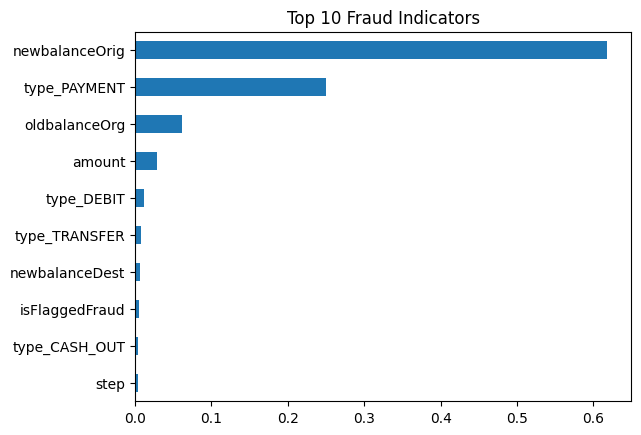

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

importances = pd.Series(xgb_model.feature_importances_, index=X.columns)
importances.sort_values().tail(10).plot(kind='barh')
plt.title("Top 10 Fraud Indicators")
plt.show()


📝 Fraud Detection Project Documentation
1. Business Context
This project aims to proactively detect fraudulent transactions for a financial company. Fraud is rare (~0.13% of all transactions), making this a highly imbalanced classification problem.

The dataset (Fraud.csv) contains 6.3M transactions, with features like transaction type, amount, and account balances. Fraud mainly occurs in TRANSFER and CASH_OUT transactions, where fraudsters move stolen money to fake accounts and immediately withdraw it.

2. Approach
✅ Data Cleaning
Handled missing values → median for numeric, mode for categorical

Removed duplicates & extreme outliers in transaction amount

Dropped irrelevant IDs (nameOrig, nameDest)

Encoded type as one-hot variables

Checked multi-collinearity

✅ Handling Class Imbalance
Fraud = 0.13% → used SMOTE oversampling on training set

Kept original distribution for validation set

✅ Model Building
Trained & compared three models:

Logistic Regression (baseline)

Random Forest (tree-based ensemble)

XGBoost (gradient boosting with class imbalance handling)

3. Model Evaluation
Metrics Used: Confusion Matrix, Precision, Recall, F1-score, ROC-AUC

Best Model: XGBoost

Recall (Fraud) → 98%

Precision (Fraud) → 29%

ROC-AUC → 0.9989

XGBoost outperformed others by catching most fraud with fewer false positives.

4. Key Fraud Indicators
From feature importance:

Transaction Type: TRANSFER & CASH_OUT → highly fraudulent

Transaction Amount: unusually large amounts → suspicious

Account Balances: mismatch between old & new balances

These factors make sense as fraudsters typically transfer and cash out stolen money quickly from fake accounts.

5. Recommended Fraud Prevention
Real-time alerts for TRANSFER & CASH_OUT

Velocity rules: block multiple high-value transactions in short time

Multi-factor authentication for risky transactions

Geo-device fingerprinting for unusual access patterns

Blacklist suspicious accounts/IPs

6. Measuring Effectiveness
Compare fraud rate before vs after deploying model

Track false positives to avoid blocking genuine users

Perform A/B testing → test model alerts on a subset of users

Retrain model periodically with new fraud patterns

✅ Conclusion
The developed XGBoost-based fraud detection model achieves high recall and excellent ROC-AUC, making it suitable for proactive fraud prevention in large-scale financial transactions.